In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

In [2]:
df = pd.read_csv('E4_ACC_data.csv')
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id
0,2021-10-27 16:13:08+00:00,2,2,56,downstairs,2
1,2021-10-27 16:13:08.031250+00:00,1,2,57,downstairs,2
2,2021-10-27 16:13:08.062500+00:00,0,3,61,downstairs,2
3,2021-10-27 16:13:08.093750+00:00,1,2,64,downstairs,2
4,2021-10-27 16:13:08.125000+00:00,2,2,60,downstairs,2


In [3]:
df.describe()

,acc_x,acc_y,acc_z,subject_id
count,63522.000000,63522.000000,63522.000000,63522.000000
mean,-5.320818,18.338245,23.066686,1.560215
std,39.691330,36.506514,28.612878,0.496365
min,-128.000000,-110.000000,-128.000000,1.000000
25%,-40.000000,-6.000000,0.000000,1.000000
50%,-6.000000,7.000000,22.000000,2.000000
75%,32.000000,42.000000,50.000000,2.000000
max,127.000000,127.000000,127.000000,2.000000


In [4]:
df.shape

(63522, 6)

In [5]:
df.isnull().any()

datatime      False
acc_x         False
acc_y         False
acc_z         False
label         False
subject_id    False
dtype: bool

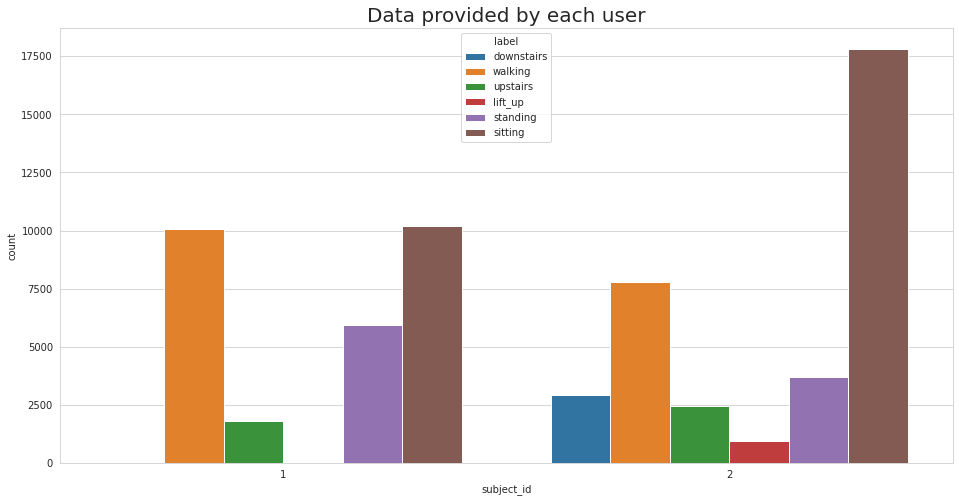

In [6]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject_id',hue='label', data = df)
plt.show()

C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


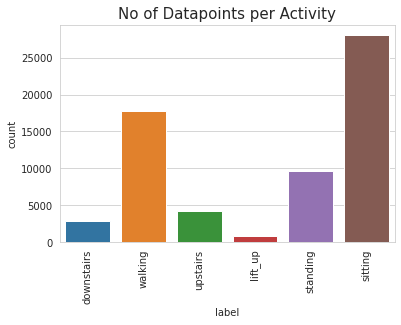

In [7]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(df.label)
plt.xticks(rotation=90)
plt.show()

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import keras
from keras import models
from keras import layers
import numpy as np
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
random.seed(321)

In [9]:
tf.keras.backend.set_floatx('float64')


In [10]:
tf.__version__


'2.6.1'

In [11]:
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id
0,2021-10-27 16:13:08+00:00,2,2,56,downstairs,2
1,2021-10-27 16:13:08.031250+00:00,1,2,57,downstairs,2
2,2021-10-27 16:13:08.062500+00:00,0,3,61,downstairs,2
3,2021-10-27 16:13:08.093750+00:00,1,2,64,downstairs,2
4,2021-10-27 16:13:08.125000+00:00,2,2,60,downstairs,2


In [12]:
df = df.reindex(columns = ['acc_x', 'acc_y', 'acc_z', 'subject_id', 'label'])
df

,acc_x,acc_y,acc_z,subject_id,label
0,2,2,56,2,downstairs
1,1,2,57,2,downstairs
2,0,3,61,2,downstairs
3,1,2,64,2,downstairs
4,2,2,60,2,downstairs
...,...,...,...,...,...
63517,18,37,56,1,upstairs
63518,25,39,54,1,upstairs
63519,37,45,56,1,upstairs
63520,45,52,66,1,upstairs


In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

activity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(activity_name_mapping)

{'downstairs': 0, 'lift_up': 1, 'sitting': 2, 'standing': 3, 'upstairs': 4, 'walking': 5}


In [14]:
X = df.iloc[:, [0, 1, 2]].values
y = df.iloc[:, -1].values

In [15]:
X

array([[ 2,  2, 56],
       [ 1,  2, 57],
       [ 0,  3, 61],
       ...,
       [37, 45, 56],
       [45, 52, 66],
       [49, 56, 71]], dtype=int64)

In [16]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 204    7   64   16   39  244]
 [   1   95   51    3    1    8]
 [  55   38 5323   67   33   86]
 [  25    9  117 1470   71  244]
 [  70    4   56  110  282  381]
 [ 184    9  201  318  256 2563]]


In [108]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc


0.7821330184966548

In [104]:
class cm_info:

    def check_number_of_data_in_each_class(x):
        return ("Data points in each class has : ", cm[x].sum() )


    def check_each_class_accuracy(confusion_matrix):
        '''  
        Pass the obtained confusion matrix
        '''
        x = confusion_matrix.shape[0]
        for i in  range(x):
            print("Total number of correct predictions for the class" ,i , " is ", confusion_matrix[i][i], "out of ",  confusion_matrix[i].sum(),
              "with a class accuracy of ", ((confusion_matrix[i][i])/confusion_matrix[i].sum())*100, "%" )

    def check_total_incorrect_predictions(x):
        return ("Total number of incorrect predictions for the class ", (cm[x].sum()) - cm[x][x])

    def return_diagonal_sum(matrix):
        return ( np.trace(matrix))

    def return_diagonal_elements(matrix):
        return np.diagonal(matrix)

    def check_if_square_matrix(m):
        return m.shape[0] == m.shape[1]


